A fake news are those stories that are false, manupulated, no solid proof or not from reliable sources.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Read datasets

In [3]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

# Analysing both datasets

In [4]:
fake.shape

(23481, 4)

In [5]:
true.shape

(21417, 4)

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [10]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

# Data cleaning and preparation

 Add flag to track fake and real

In [12]:

fake['target'] = 'fake'
true['target'] = 'true'

In [13]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [14]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


Concatenate dataframes

In [15]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [16]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [17]:
data.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


This shows that data is not shuffled as true values are concentrated on below indexes while all fake values at top indexes. This will create problem while doing train test split.

# Shuffling the data

In [18]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [19]:
# Checking data
data.head()

,title,text,subject,date,target
0,Suspicious substance at Cruz's Houston headqua...,HOUSTON (Reuters) - A suspicious substance fou...,politicsNews,"March 10, 2016",true
1,WATCH: “NASTY” SAN JUAN MAYOR Continues To Bit...,San Juan Mayor Carmen Yulin Cruz tore a book f...,left-news,"Oct 5, 2017",fake
2,TWISTED! Anti-American Riots By Illegals Portr...,More protests are probably happening today at ...,left-news,"Apr 30, 2016",fake
3,Australian PM's support falls to new lows amid...,MELBOURNE (Reuters) - Australian Prime Ministe...,worldnews,"November 13, 2017",true
4,"As election looms, Trump says he is 'last chan...","MANCHESTER, N.H./STERLING HEIGHTS, MICHIGAN (R...",politicsNews,"November 7, 2016",true


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [21]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Suspicious substance at Cruz's Houston headqua...,HOUSTON (Reuters) - A suspicious substance fou...,politicsNews,true
1,WATCH: “NASTY” SAN JUAN MAYOR Continues To Bit...,San Juan Mayor Carmen Yulin Cruz tore a book f...,left-news,fake
2,TWISTED! Anti-American Riots By Illegals Portr...,More protests are probably happening today at ...,left-news,fake
3,Australian PM's support falls to new lows amid...,MELBOURNE (Reuters) - Australian Prime Ministe...,worldnews,true
4,"As election looms, Trump says he is 'last chan...","MANCHESTER, N.H./STERLING HEIGHTS, MICHIGAN (R...",politicsNews,true


In [22]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,HOUSTON (Reuters) - A suspicious substance fou...,politicsNews,true
1,San Juan Mayor Carmen Yulin Cruz tore a book f...,left-news,fake
2,More protests are probably happening today at ...,left-news,fake
3,MELBOURNE (Reuters) - Australian Prime Ministe...,worldnews,true
4,"MANCHESTER, N.H./STERLING HEIGHTS, MICHIGAN (R...",politicsNews,true


In [23]:
# Converting text to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,houston (reuters) - a suspicious substance fou...,politicsNews,true
1,san juan mayor carmen yulin cruz tore a book f...,left-news,fake
2,more protests are probably happening today at ...,left-news,fake
3,melbourne (reuters) - australian prime ministe...,worldnews,true
4,"manchester, n.h./sterling heights, michigan (r...",politicsNews,true


In [24]:
# Removing punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [25]:
# Checking
data.head()

,text,subject,target
0,houston reuters a suspicious substance found ...,politicsNews,true
1,san juan mayor carmen yulin cruz tore a book f...,left-news,fake
2,more protests are probably happening today at ...,left-news,fake
3,melbourne reuters australian prime minister m...,worldnews,true
4,manchester nhsterling heights michigan reuters...,politicsNews,true


Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

In [26]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vijaysales\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
data.head()

,text,subject,target
0,houston reuters suspicious substance found hou...,politicsNews,true
1,san juan mayor carmen yulin cruz tore book nas...,left-news,fake
2,protests probably happening today california s...,left-news,fake
3,melbourne reuters australian prime minister ma...,worldnews,true
4,manchester nhsterling heights michigan reuters...,politicsNews,true


This is cleaned data

# Basic data exploration and visualization

articles per subject

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


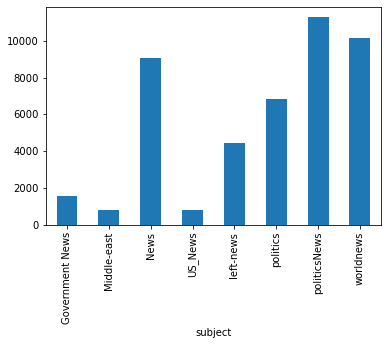

In [28]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

Fake and real articles count

target
fake    23481
true    21417
Name: text, dtype: int64


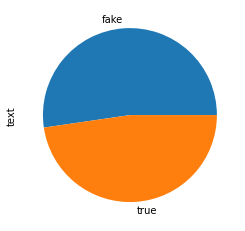

In [44]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="pie")
plt.show()

# Wordcloud 

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

In [31]:
!pip install wordcloud

In [32]:
from wordcloud import WordCloud

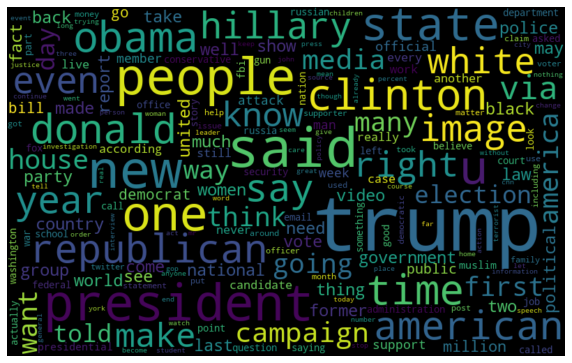

In [33]:
# Word cloud for fake news

from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

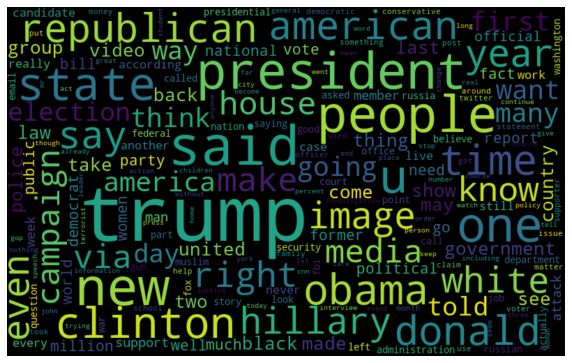

In [34]:
# Word cloud for real news

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

 Most frequent words counter 

In [35]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()


In [45]:
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'maroon')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

Most frequent words in fake news

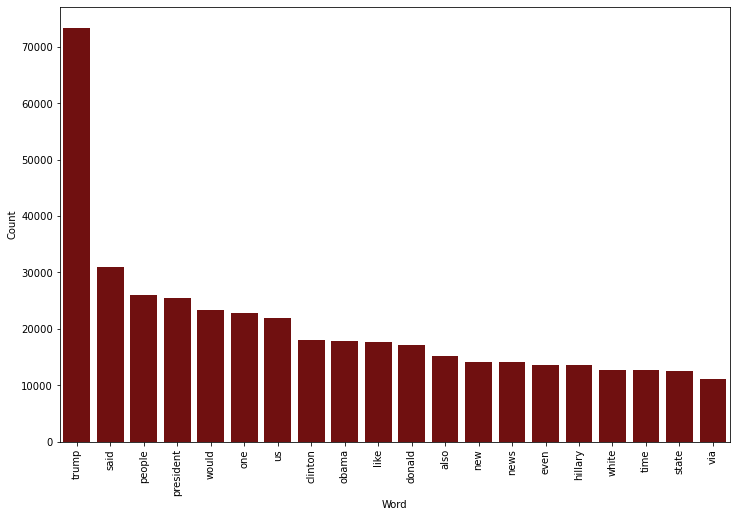

In [46]:
counter(data[data["target"] == "fake"], "text", 20)

Most frequent words in real news

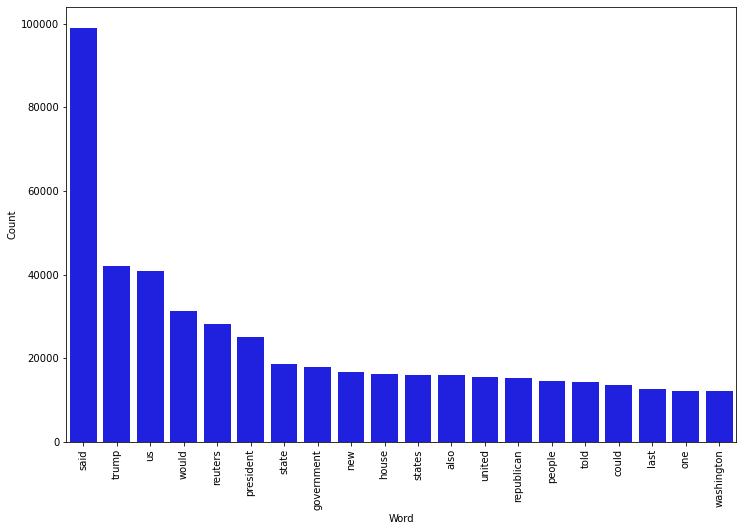

In [38]:

counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [39]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Split Data

In [40]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [41]:
X_train.head()

36335    dubai reuters senior uae diplomat said wednesd...
12384    london reuters london police said lifted cordo...
24419    something definitely trump family values seem ...
24740    new york reuters us president donald trump sai...
27039    reuters us lawmaker called congressional commi...
Name: text, dtype: object

In [42]:
y_train.head()

36335    true
12384    true
24419    fake
24740    true
27039    true
Name: target, dtype: object

# Decision Tree Classifier

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

### TFIDFVectorizer for handling the news data¶

TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator.

In NLP, tf-idf is an important measure and is used by algorithms like cosine similarity to find documents that are similar to a given search query.

### Term Frequency (tf)

tf is the number of times a term appears in a particular document. So it’s specific to a document. A few of the ways to calculate tf is given below:-

tf(t) = No. of times term ‘t’ occurs in a document

### Inverse Document Frequency (idf)

idf is a measure of how common or rare a term is across the entire corpus of documents. So the point to note is that it’s common to all the documents. If the word is common and appears in many documents, the idf value (normalized) will approach 0 or else approach 1 if it’s rare. A few of the ways we can calculate idf value for a term is given below.

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.58%


# Confusion matrix

A confusion matrix visualizes and summarizes the performance of a classification algorithm.

Confusion matrix, without normalization


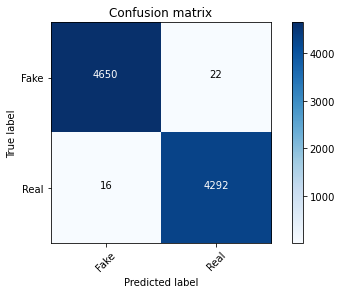

In [47]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# PassiveAggressiveClassifier

- Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model.
- Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

Importing libraries 

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the few ‘online-learning algorithms‘. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step, as opposed to batch learning, where the entire training dataset is used at once. This is very useful in situations where there is a huge amount of data and it is computationally infeasible to train the entire dataset because of the sheer size of the data. We can simply say that an online-learning algorithm will get a training example, update the classifier, and then throw away the example.

A very good example of this would be to detect fake news on a social media website like Twitter, where new data is being added every second. To dynamically read data from Twitter continuously, the data would be huge, and using an online-learning algorithm would be ideal.

Passive-Aggressive algorithms are somewhat similar to a Perceptron model, in the sense that they do not require a learning rate. However, they do include a regularization parameter.

#### Simply put, it remains passive for correct predictions and responds aggressively to incorrect predictions.

In [58]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(X_train)
tfid_x_test = tfvect.transform(X_test)

# Fitting the model

In [59]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

# Accuracy

In [60]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.35%


# Function creation

In [64]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

# Function testing

In [65]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')


['true']


In [66]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)


['fake']


# Save dataframe to file

In [67]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [68]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [69]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)

# Conclusion

Successfully trained the fake news detector model